<a href="https://colab.research.google.com/github/kingsuching/data-301-final-project/blob/main/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("drive/MyDrive/df.csv")
df_departures = pd.read_csv("drive/MyDrive/df_departures.csv")
df_arrivals = pd.read_csv("drive/MyDrive/df_arrivals.csv")

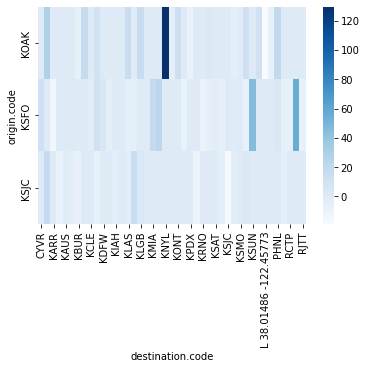

In [ ]:
import seaborn as sns
df_heatmap = df_departures.pivot_table(values = "departure_delay", index="origin.code", columns="destination.code", aggfunc = np.mean).fillna(0)
df_heatmap = df_heatmap/60
sns.heatmap(df_heatmap, cmap="Blues")

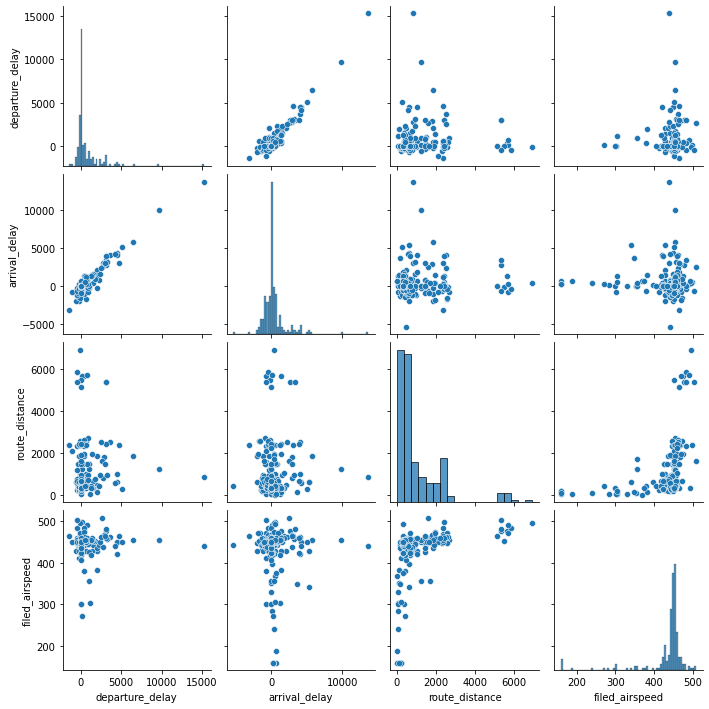

In [ ]:
sns.pairplot(df_arrivals[["departure_delay", "arrival_delay", "route_distance", "filed_airspeed"]])

In [ ]:
df_arrivals.columns

Index(['Unnamed: 0', 'ident', 'fa_flight_id', 'operator', 'operator_iata',
       'flight_number', 'registration', 'atc_ident', 'inbound_fa_flight_id',
       'codeshares', 'blocked', 'diverted', 'cancelled', 'position_only',
       'departure_delay', 'arrival_delay', 'filed_ete', 'scheduled_out',
       'estimated_out', 'actual_out', 'scheduled_off', 'estimated_off',
       'actual_off', 'scheduled_on', 'estimated_on', 'actual_on',
       'scheduled_in', 'estimated_in', 'actual_in', 'progress_percent',
       'status', 'aircraft_type', 'route_distance', 'filed_airspeed',
       'filed_altitude', 'route', 'baggage_claim', 'seats_cabin_business',
       'seats_cabin_coach', 'seats_cabin_first', 'gate_origin',
       'gate_destination', 'terminal_origin', 'terminal_destination', 'type',
       'origin.code', 'origin.airport_info_url', 'destination.code',
       'destination.airport_info_url'],
      dtype='object')

In [ ]:
pd.crosstab(df_arrivals["diverted"], df_arrivals["diverted"], normalize=True).divide(df_arrivals["diverted"].value_counts(normalize=True))

diverted,False
diverted,
False,1.0


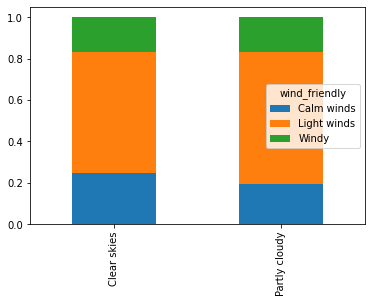

In [ ]:
pd.crosstab(df["wind_friendly"], df["cloud_friendly"], normalize=True).divide(df["cloud_friendly"].value_counts(normalize=True)).T.plot.bar(stacked=True)

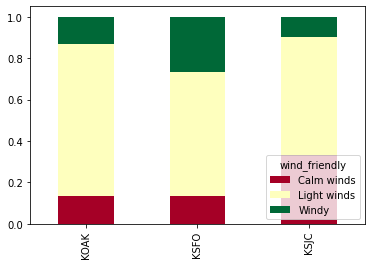

In [ ]:
pd.crosstab(df["wind_friendly"], df["airport_code"]).divide(df["airport_code"].value_counts()).T.plot.bar(stacked=True, cmap="RdYlGn")

Text(0, 0.5, 'departure_delay')

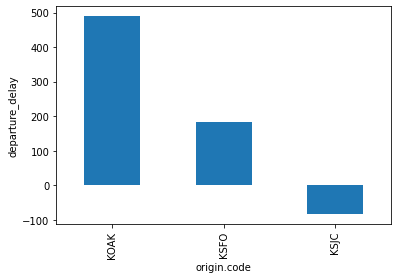

In [ ]:
df_departures.groupby("origin.code")["departure_delay"].mean().plot.bar()
plt.ylabel("departure_delay")

In [ ]:
import plotly.express as py
py.box(df_departures[df_departures["type"] == "Airline"], x="aircraft_type", y="departure_delay")

In [ ]:
py.bar(df.groupby("wind_friendly")["delay_secs"].mean())

In [ ]:
py.box(df_departures[df_departures["type"] == "Airline"], x="aircraft_type", y="arrival_delay", facet_row="origin.code").add_hline(y = df_departures["arrival_delay"].mean())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



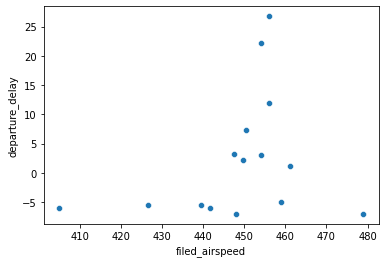

In [ ]:
speeds = df_departures.groupby("operator")["filed_airspeed"].mean()
arrival_delays = df_departures.groupby("operator")["departure_delay"].mean()
sns.scatterplot(speeds, arrival_delays/60)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



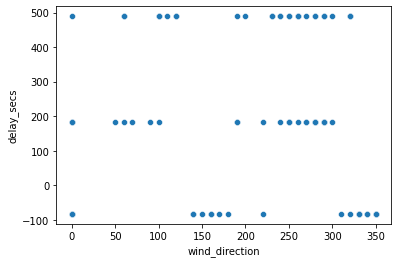

In [ ]:
df_arrivals.index = range(len(df_arrivals))
df_obs = df_obs = df[(df["visibility"] <= 10) & (df["pressure"] < 1000)]
df_obs.index = range(len(df_obs))
sns.scatterplot(df_obs["wind_direction"], df_obs["delay_secs"])

Text(0, 0.5, 'arrival delay')

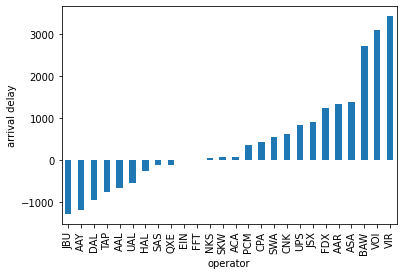

In [ ]:
df_arrivals[df_arrivals["type"] == "Airline"].groupby("operator")["arrival_delay"].mean().sort_values().plot.bar()
plt.ylabel("arrival delay")

Text(0, 0.5, 'departure delay')

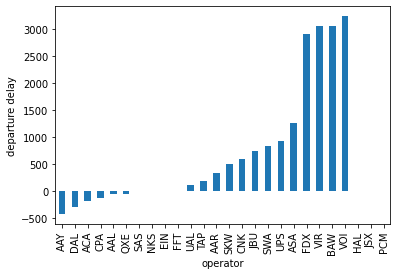

In [ ]:
df_arrivals[df_arrivals["type"] == "Airline"].groupby("operator")["departure_delay"].mean().sort_values().plot.bar()
plt.ylabel("departure delay")

Text(0, 0.5, 'net shift')

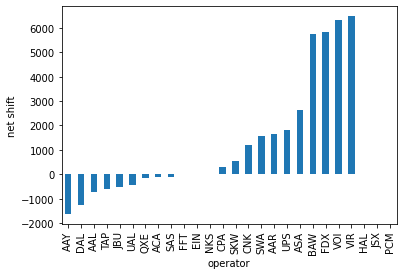

In [ ]:
df_arrivals["shift"] = df_arrivals["departure_delay"] + df_arrivals["arrival_delay"]
df_arrivals[df_arrivals["type"] == "Airline"].groupby("operator")["shift"].mean().sort_values().plot.bar()
plt.ylabel("net shift")